In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("..")

In [3]:
from deepsvg.svglib.geom import Point
from deepsvg.svglib.svg import SVG
from deepsvg.svglib.svg_path import SVGPath
from deepsvg.svglib.utils import to_gif

from deepsvg.difflib.tensor import SVGTensor
from deepsvg.difflib.utils import *
from deepsvg.difflib.loss import *

In [4]:
import torch.optim as optim
import IPython.display as ipd
from moviepy.editor import ImageClip, concatenate_videoclips, ipython_display

In [5]:
import pickle
import csv

# Differentiable SVGTensor optimization

Load a target SVG and apply the standard pre-processing.

In [6]:
svg = SVG.load_svg("docs/imgs/dolphin.svg").normalize().zoom(0.9).canonicalize().simplify_heuristic()

simplify


Convert the SVG to the differentiable SVGTensor data-structure.

In [7]:
svg_target = SVGTensor.from_data(svg.to_tensor())

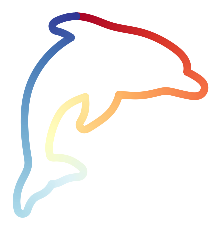

In [8]:
p_target = svg_target.sample_points()
plot_points(p_target, show_color=True)

Create an arbitrary SVG whose Bézier parameters will be optimized to match the target shape.

In [9]:
circle = SVG.unit_circle().normalize().zoom(0.9).split(8)  # split: 1/2/4/8
svg_pred = SVGTensor.from_data(circle.to_tensor())

SVGTensor enables to sample points in a differentiable way, so that the loss that will be backpropagated down to the SVG Bézier parameters.

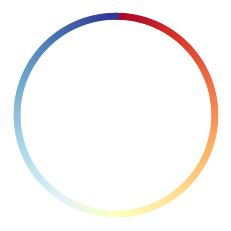

In [10]:
p_pred = svg_pred.sample_points()
plot_points(p_pred, show_color=True)

In [11]:
svg_pred.control1.requires_grad_(True)
svg_pred.control2.requires_grad_(True)
svg_pred.end_pos.requires_grad_(True);

In [12]:
optimizer = optim.Adam([svg_pred.control1, svg_pred.control2, svg_pred.end_pos], lr=0.1)

Write a standard gradient descent algorithm and observe the step-by-step optimization!

In [13]:
img_list = []

for i in range(150):
    optimizer.zero_grad()

    p_pred = svg_pred.sample_points()
    l = svg_emd_loss(p_pred, p_target)
    l.backward()
    optimizer.step()
    
    if i % 4 == 0:
        img = svg_pred.draw(with_points=True, do_display=False, return_png=True)
        img_list.append(img)
            
to_gif(img_list)

In [14]:
svg = SVG.load_svg("docs/imgs/dolphin.svg")
print(svg)
svg_tensor = svg.to_tensor()
print(svg_tensor)

SVG[Bbox(0.0 0.0 294.8680114746094 294.8680114746094)](
	SVGPathGroup(SVGPath(M[P(0.0, 0.0), P(284.3949890136719, 115.12999725341797)] C[P(284.3949890136719, 115.12999725341797), P(280.5419921875, 119.21499633789062), P(274.864990234375, 119.21499633789062), P(272.9989929199219, 119.21499633789062)] C[P(272.9989929199219, 119.21499633789062), P(269.53900146484375, 119.21499633789062), P(265.260986328125, 118.64199829101562), P(259.1309814453125, 117.35599517822266)] C[P(259.1309814453125, 117.35599517822266), P(254.31597900390625, 116.34599304199219), P(250.16998291015625, 115.33899688720703), P(246.51397705078125, 114.45199584960938)] C[P(246.51397705078125, 114.45199584960938), P(239.3219757080078, 112.70499420166016), P(234.1239776611328, 111.4419937133789), P(229.23097229003906, 111.4419937133789)] C[P(229.23097229003906, 111.4419937133789), P(226.4729766845703, 111.4419937133789), P(221.44097900390625, 112.63699340820312), P(216.11196899414062, 113.90299224853516)] C[P(216.1119689

# Save svg tensor in a .pkl file

svg_file_name 944.svg
svg_file_name 414.svg
svg_file_name 840.svg
svg_file_name 355.svg
svg_file_name 559.svg
svg_file_name 63.svg
svg_file_name 87.svg
svg_file_name 65.svg
svg_file_name 322.svg
svg_file_name 449.svg
svg_file_name 853.svg
svg_file_name 803.svg
svg_file_name 293.svg
svg_file_name 368.svg
svg_file_name 37.svg
svg_file_name 487.svg
svg_file_name 177.svg
svg_file_name 634.svg
svg_file_name 288.svg
svg_file_name 131.svg
svg_file_name 115.svg
svg_file_name 458.svg
svg_file_name 1002.svg
svg_file_name 19.svg
svg_file_name 6.svg
svg_file_name 535.svg
svg_file_name 135.svg
svg_file_name 203.svg
svg_file_name 43.svg
svg_file_name 375.svg
svg_file_name 710.svg
svg_file_name 146.svg
svg_file_name 526.svg
svg_file_name 850.svg
svg_file_name 560.svg
svg_file_name 705.svg
svg_file_name 813.svg
svg_file_name 874.svg
svg_file_name 777.svg
svg_file_name 829.svg


RuntimeError: There were no tensor arguments to this function (e.g., you passed an empty list of Tensors), but no fallback function is registered for schema aten::_cat.  This usually means that this function requires a non-empty list of Tensors.  Available functions are [CUDATensorId, CPUTensorId, VariableTensorId]